# Image Denoising Using Neural Network (**AutoEncoder**)

In [1]:
# importing the dependencies
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import cv2

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#importing the Dataset
#url : https://www.kaggle.com/zalando-research/fashionmnist
img_database = np.loadtxt('/content/drive/MyDrive/Datasets/Fashion Mnist/fashion-mnist_train.csv', delimiter = ',', skiprows = 1)[:,1:]
 #lookig at the shape of the file
print(img_database.shape)
total_num_images = (img_database.shape[0])

(60000, 784)


In [3]:
n_input = 784 # input image is of size 28 x 28
hidden_layer_1 = 256
hidden_layer_2 = 32
hidden_layer_3 = 32
hidden_layer_4 = 256
output_layer = 784 # same as the n_input dimension 
#parameters 
learning_rate = 0.1
epochs = 100;
batch_size = 100

#Define the placeholders
# version 2.0 of tf doesnt support place holder so make changes as 
# import tensorflow.compat.v1 as tf
#  tf.disable_v2_behavior()
X = tf.placeholder(tf.float32, [None , n_input])
Y = tf.placeholder(tf.float32, [None, output_layer])

# weight and bias defination of neural network as dictionary
# not needed when using tensorflow api used only when using computational graph
Weight_NN = { "W1" : tf.Variable(tf.random_normal([n_input, hidden_layer_1])),
              "W2" : tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2])),
              "W3" : tf.Variable(tf.random_normal([hidden_layer_2, hidden_layer_3])),
              "W4" : tf.Variable(tf.random_normal([hidden_layer_3, hidden_layer_4])),
              "W5" : tf.Variable(tf.random_normal([hidden_layer_4, output_layer]))

            }

Bias_NN  =   { "B1" : tf.Variable(tf.random_normal([hidden_layer_1])),
               "B2" : tf.Variable(tf.random_normal([hidden_layer_2])),
               "B3" : tf.Variable(tf.random_normal([hidden_layer_3])),
               "B4" : tf.Variable(tf.random_normal([hidden_layer_4])),
               "B5" : tf.Variable(tf.random_normal([output_layer]))
             }    


In [4]:
#creating a computational graph 
# neural network 
Z1 = tf.add(tf.matmul(X, Weight_NN["W1"]), Bias_NN["B1"])
Z1_out = tf.nn.sigmoid(Z1)

Z2 = tf.add(tf.matmul(Z1_out, Weight_NN["W2"]), Bias_NN["B2"])
Z2_out = tf.nn.sigmoid(Z2)

Z3 = tf.add(tf.matmul(Z2_out, Weight_NN["W3"]), Bias_NN["B3"])
Z3_out = tf.nn.sigmoid(Z3)

Z4 = tf.add(tf.matmul(Z3_out, Weight_NN["W4"]), Bias_NN["B4"])
Z4_out = tf.nn.sigmoid(Z4)

Z5 = tf.add(tf.matmul(Z4_out, Weight_NN["W5"]), Bias_NN["B5"])
NN_output = (Z5)

In [ ]:
# implementing Neural Network Model Using Tensorflow api not using computational graph 
# no need to define weight dictionary and bias dictionary 

Z1 = tf.layers.dense(X, hidden_layer_1 , activation = tf.nn.sigmoid)
Z2 = tf.layers.dense(Z1, hidden_layer_2 , activation = tf.nn.sigmoid)
Z3 = tf.layers.dense(Z2, hidden_layer_3 , activation = tf.nn.sigmoid)
Z4 = tf.layers.dense(Z3, hidden_layer_4 , activation = tf.nn.sigmoid)
NN_output = tf.layers.dense(Z4,output_layer)

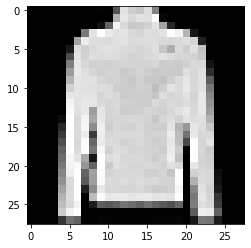

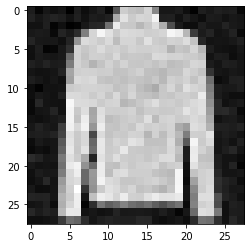

In [5]:
# Dataset Preparation 
#Shuffle the Dataset To avoid any biasness
np.random.shuffle(img_database)

X_train = img_database

#Normalize the dataset 
X_train = X_train

# Create a noisy Dataset 

X_train_noisy = X_train + 10* np.random.normal(0,1 , size = X_train.shape)

#original image 
plt.imshow(X_train[0].reshape(28,28), cmap = 'gray')
plt.show()
# Noisy Image
plt.imshow(X_train_noisy[0].reshape(28,28),cmap = 'gray')
plt.show()


In [6]:
# Define the metrics 
# The loss function
computed_loss = tf.reduce_mean(tf.square(NN_output - Y))

# Dfine the Optimizer 
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(computed_loss)

# initialize the variables 
init = tf.global_variables_initializer()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
#initialize the session 
sess = tf.Session()
sess.run(init)
for epoch in range(epochs):
     for i in range(int(int(total_num_images/batch_size))):
        X_epoch = X_train[ i*batch_size : (i+1)*batch_size ]
        X_noise_epoch = X_train_noisy[ i*batch_size : (i+1)*batch_size ]
        _, loss = sess.run([optimizer, computed_loss], feed_dict = {X: X_noise_epoch, Y: X_epoch })
     print('Epoch No : ', epoch ,'/', epochs , 'loss:', loss) 


Epoch No :  0 / 100 loss: 3485.8918
Epoch No :  1 / 100 loss: 3242.2585
Epoch No :  2 / 100 loss: 3032.0408
Epoch No :  3 / 100 loss: 2818.7131
Epoch No :  4 / 100 loss: 2686.7476
Epoch No :  5 / 100 loss: 2524.5928
Epoch No :  6 / 100 loss: 2630.7288
Epoch No :  7 / 100 loss: 2508.2642
Epoch No :  8 / 100 loss: 2442.6013
Epoch No :  9 / 100 loss: 2460.5322
Epoch No :  10 / 100 loss: 2496.5151
Epoch No :  11 / 100 loss: 2420.7007
Epoch No :  12 / 100 loss: 2298.268
Epoch No :  13 / 100 loss: 2298.2866
Epoch No :  14 / 100 loss: 2203.7192
Epoch No :  15 / 100 loss: 2203.401
Epoch No :  16 / 100 loss: 2163.234
Epoch No :  17 / 100 loss: 2193.5898
Epoch No :  18 / 100 loss: 2148.536
Epoch No :  19 / 100 loss: 2233.6506
Epoch No :  20 / 100 loss: 2161.8713
Epoch No :  21 / 100 loss: 2136.5518
Epoch No :  22 / 100 loss: 2076.9666
Epoch No :  23 / 100 loss: 2109.9253
Epoch No :  24 / 100 loss: 2084.4185
Epoch No :  25 / 100 loss: 2038.0428
Epoch No :  26 / 100 loss: 2116.9172
Epoch No :  27 

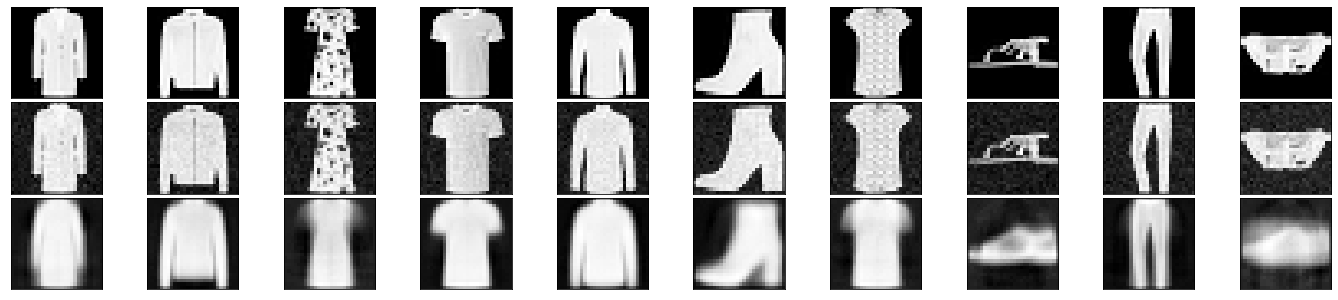

In [10]:
# Pick Any Image
X_actual = X_train[20:30] 
noisy_image = X_train_noisy[20:30]
#X_actual = '/content/drive/MyDrive/Datasets/image1.jpeg'

# run it though the autoencoder
denoised_image = sess.run(NN_output , feed_dict = {X:noisy_image})

#print the original image
fig , axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_actual, noisy_image , denoised_image], axes):
    for img, ax in zip(images,row):
        ax.imshow(img.reshape((28,28)), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        fig.tight_layout(pad=0.1)       

# Another way of running session

In [ ]:
#X_actual = X_train[20:30]
#noisy_image = X_train_noisy[20:30]
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for i in range(int(total_num_images/batch_size)):
       X_epoch = X_train[ i*batch_size : (i+1)*batch_size ]
       X_noise_epoch = X_train_noisy[ i*batch_size : (i+1)*batch_size ]
       _, loss = sess.run([optimizer , computed_loss], feed_dict = {X: X_noise_epoch, Y: X_epoch})
    print('Epoch No : ', epoch, '/', epochs, 'Loss : ',loss)

#pick any image
X_actual = X_train[20:30] 
noisy_image = X_train_noisy[20:30]   
denoised_image = sess.run(NN_output, feed_dict = {X:noisy_image})

#print the original image    
fig, axes = plt.subplots(nrows = 3 ,ncols=10 , sharex= True ,sharey= True , figsize=(20,4))
for images, row in zip([X_actual, noisy_image, denoised_image], axes):
    for img, ax in zip(images,row) :
        ax.imshow(img.reshape((28, 28)), cmap = 'gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        fig.tight_layout(pad=0.1) 